#Salary data(classification)

In [ ]:
import pandas as pd
df=pd.read_csv("/content/salaries.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [ ]:
target=df["salary_more_then_100k"]
target

,salary_more_then_100k
0,0
1,0
2,1
3,1
4,0
5,1
6,0
7,0
8,0
9,1


In [ ]:
inputs=df.drop(["salary_more_then_100k"],axis="columns")
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
inputs["company"]=le.fit_transform(inputs["company"])
inputs["job"]=le.fit_transform(inputs["job"])
inputs["company"]=le.fit_transform(inputs["company"])
inputs


,company,job,degree
0,2,2,bachelors
1,2,2,masters
2,2,0,bachelors
3,2,0,masters
4,2,1,bachelors
5,2,1,masters
6,0,2,masters
7,0,1,bachelors
8,0,0,bachelors
9,0,0,masters


In [ ]:
inputs['degree']=le.fit_transform(inputs['degree'])


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(inputs,target)
model.score(inputs,target)


1.0

In [ ]:
model.predict([[2,2,0]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

# Regression (diamond)

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/diamonds.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.duplicated().sum()

np.int64(126)

In [ ]:
df.shape

(50000, 10)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(49874, 10)

In [ ]:
print(df['color'].unique())

['E' 'I' 'J' 'H' 'F' 'G' 'D']


In [ ]:
df["color"].replace(["J","I","H","G","F","E","D"],[1,2,3,4,5,6,7],inplace=True)

/tmp/ipython-input-3506981231.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["color"].replace(["J","I","H","G","F","E","D"],[1,2,3,4,5,6,7],inplace=True)
/tmp/ipython-input-3506981231.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["color"].replace(["J","I","H","G","F","E","D"],[1,2,3

In [ ]:
print(df['cut'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


In [ ]:
print(df["clarity"].unique())

['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [ ]:
df["clarity"].replace(["I1","SI2","SI1","VS2","VS1", "VVS2","VVS1","IF"],[1,2,3,4,5,6,7,8],inplace=True)

/tmp/ipython-input-1815044495.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["clarity"].replace(["I1","SI2","SI1","VS2","VS1", "VVS2","VVS1","IF"],[1,2,3,4,5,6,7,8],inplace=True)
/tmp/ipython-input-1815044495.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["clarity"].replace(["I1","SI

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,7,3,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,7,3,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,7,3,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,3,2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df["cut"].replace(["Fair","Good","Very Good","Premium","Ideal"],[1,2,3,4,5],inplace=True)

/tmp/ipython-input-4093677976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["cut"].replace(["Fair","Good","Very Good","Premium","Ideal"],[1,2,3,4,5],inplace=True)
/tmp/ipython-input-4093677976.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["cut"].replace(["Fair","Good","Very Good","

# **correlation**

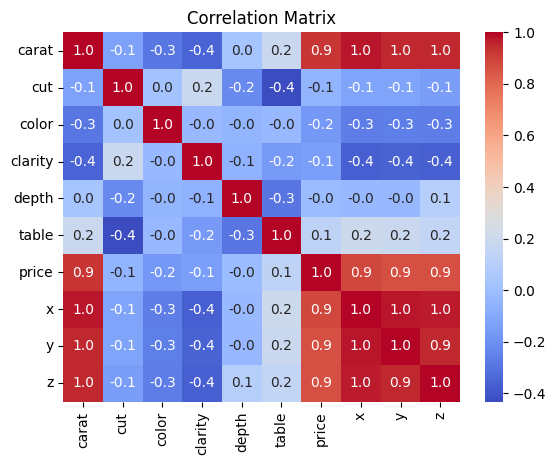

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True, fmt='0.01f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.drop(["x","y","z"],axis=1,inplace=True)

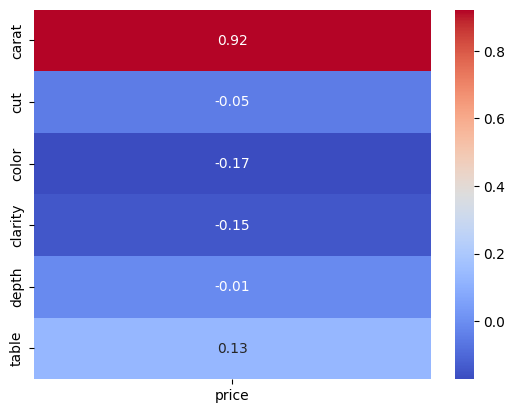

In [ ]:
price_corr = df.corr()["price"]
price_corr = price_corr.drop("price")
sns.heatmap(price_corr.to_frame(), annot=True, fmt='.2f', cmap='coolwarm',
            cbar=True, annot_kws={'size': 10})
plt.title
plt.show()

In [ ]:
df.drop(["cut","depth"],axis=1,inplace=True)

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import accuracy_score
import pandas as pd



X = df[["carat","color","clarity","table"]]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model =LinearRegression ()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.90338176309353

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.9669238234293863